### Histograma

Um histograma é uma espécie de gráfico de barras que demonstra uma distribuição de frequências. No histograma, a base de cada uma das barras representa uma classe e a altura representa a quantidade ou frequência absoluta com que o valor de cada classe ocorre.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Criando uma serie
km = pd.Series([4,6,11,13,18,6,7,18,21,43,45,49,24,26,27,35,36,36,42])

In [3]:
# Criando uma função para retornar o valor de intervalo ticks
def ticks(lista, bars):
    lista.sort()
    inter = (lista[-1] - lista[0])/bars # O intervalo é maior valor menos o menor 
    tick = [lista[0]]                        # valor dividor pelas barras(bins)
    ult = lista[0] + inter
    tick.append(ult)
    for x in range(bars-1):   # sempre somando o intervalo 4+9: 13+9 ate o final
        ult += inter
        tick.append(ult)
    return tick

In [4]:
def frequencia_relativa(total,yticks):
    freq_rel = []
    for item in yticks:
        x = item/total
        freq_rel.append("{0:.2f}%".format(x*100))
    return freq_rel

In [5]:
def pct(x):
    return "{0:.2f}%".format(x*100)

In [6]:
# Criando uma função para gerar um histograma
def gera_histograma(barras, data_series, titulo, unidade): 
    # Criando uma lista a partir de um data series
    lista_km = data_series.values

    # Plotando o histograma dos valores acima
    plt.figure(figsize=(8,5), dpi=100)
    ax = data_series.plot.hist(bins=barras, rwidth=0.98)

    # Formatação y-axis para valores da frequencia relativa
    yticks = ax.get_yticks()
    total = len(lista_km)
    freq_rel = frequencia_relativa(total, yticks)
    ax.set_yticklabels(freq_rel)

    # Detalhes do gráfico
    stick = ticks(lista_km, barras)
    plt.xticks(stick)
    plt.grid(axis='y')
    plt.title(titulo)
    plt.xlabel(unidade)
    plt.ylabel('Frequência')
    plt.show()

C:\Users\wende\AppData\Local\Temp\ipykernel_2296\2967141880.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(freq_rel)


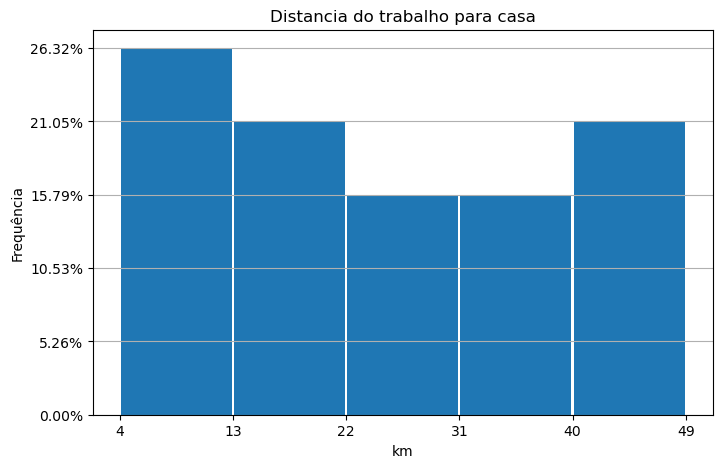

In [7]:
# Chamando a função para gerar o histograma
gera_histograma(5, km, 'Distancia do trabalho para casa', 'km')

### Medidas Centrais - Média, Mediana e Moda

Média: é calculada somando-se todos os valores de um conjunto de dados e dividindo-se pelo número de elementos deste conjunto.

Mediana: representa o valor central de um conjunto de dados. Para encontrar o valor da mediana é necessário colocar os valores em ordem crescente ou decrescente.

Moda: representa o valor mais frequente de um conjunto de dados, sendo assim, para defini-la basta observar a frequência com que os valores aparecem.

In [8]:
# Importando a lib statistic
import statistics as stats
import math

# Lista 
valores = [4,6,11,13,18,6,7,18,21,43,45,49,24,26,27,35,36,36,6,42]

In [9]:
# Média
stats.mean(valores)

23.65

In [10]:
# Mediana
stats.median(valores)

22.5

In [11]:
# Moda
stats.mode(valores)

6

### Medidas de Dispersão

In [12]:
# Carregando os dados para analise
data = pd.read_csv('weight-height.csv')

In [13]:
# Renomeando colunas 
data.columns = ['Genero', 'Altura', 'Peso']

In [14]:
# Criando uma coluna com os valores da altura em centimetro
data['Altura cm'] = round(data['Altura'] * 2.54)

In [15]:
# Criando uma coluna convertendo os valores para peso kg
data['Peso kg'] = round(data['Peso'] * 0.453592, 1)

In [16]:
data.head()

,Genero,Altura,Peso,Altura cm,Peso kg
0,Male,73.847017,241.893563,188.0,109.7
1,Male,68.781904,162.310473,175.0,73.6
2,Male,74.110105,212.740856,188.0,96.5
3,Male,71.730978,220.042470,182.0,99.8
4,Male,69.881796,206.349801,177.0,93.6


In [17]:
# Separando os dados para analisar no histograma, altura e peso por genero 
altura_mulheres = data.loc[data['Genero'] == 'Female']['Altura cm'] 
altura_homens = data.loc[data['Genero'] == 'Male']['Altura cm']
peso_mulheres = data.loc[data['Genero'] == 'Female']['Peso kg'] 
peso_homens = data.loc[data['Genero'] == 'Male']['Peso kg']

C:\Users\wende\AppData\Local\Temp\ipykernel_2296\2967141880.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(freq_rel)


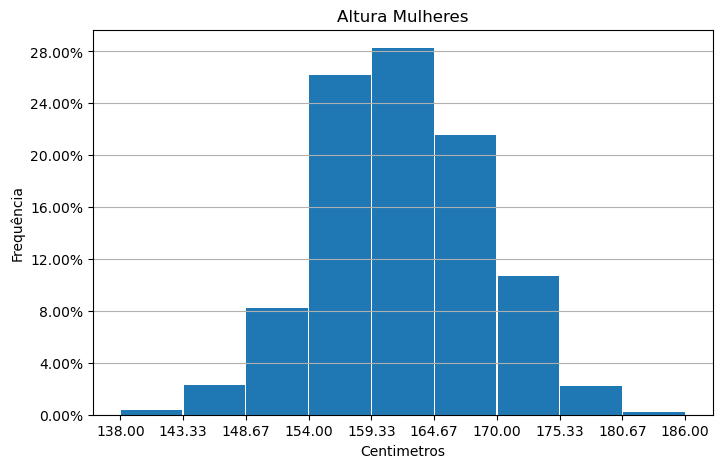

In [18]:
# Visualizando histograma genero feminino
gera_histograma(9, altura_mulheres, 'Altura Mulheres', 'Centimetros')

### Temos uma distribuição normal para abos os gráficos, tendo a media, mediana e moda centralizadas

C:\Users\wende\AppData\Local\Temp\ipykernel_2296\2967141880.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(freq_rel)


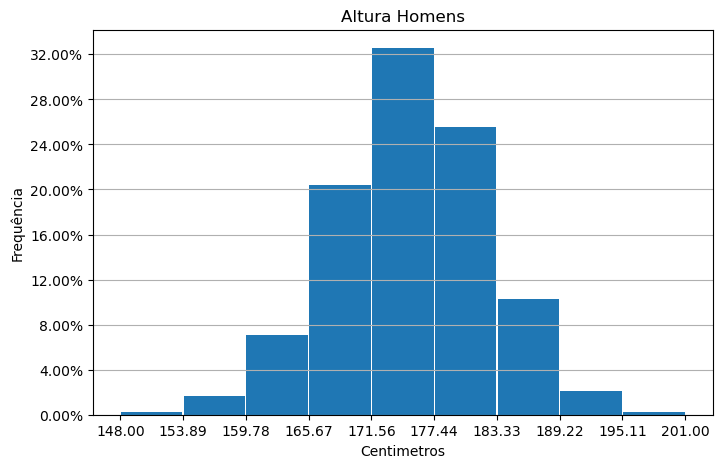

In [19]:
# Visualizando histograma genero masculino
gera_histograma(9, altura_homens, 'Altura Homens', 'Centimetros')

C:\Users\wende\AppData\Local\Temp\ipykernel_2296\2967141880.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(freq_rel)


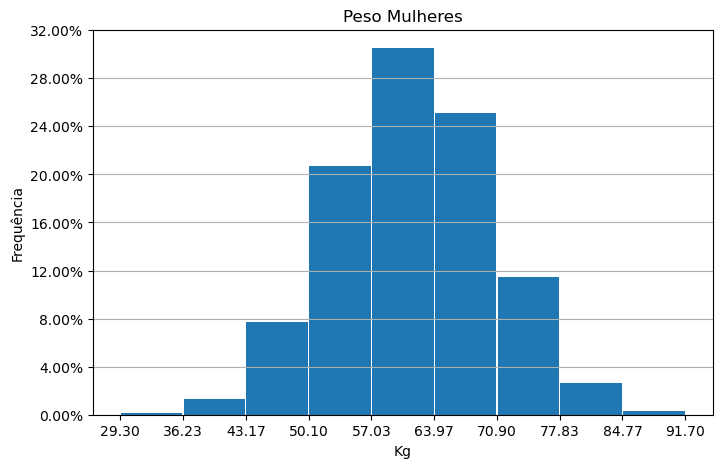

In [20]:
# Analisando a distribuição do peso das mulheres
gera_histograma(9, peso_mulheres, 'Peso Mulheres', 'Kg')

C:\Users\wende\AppData\Local\Temp\ipykernel_2296\2967141880.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(freq_rel)


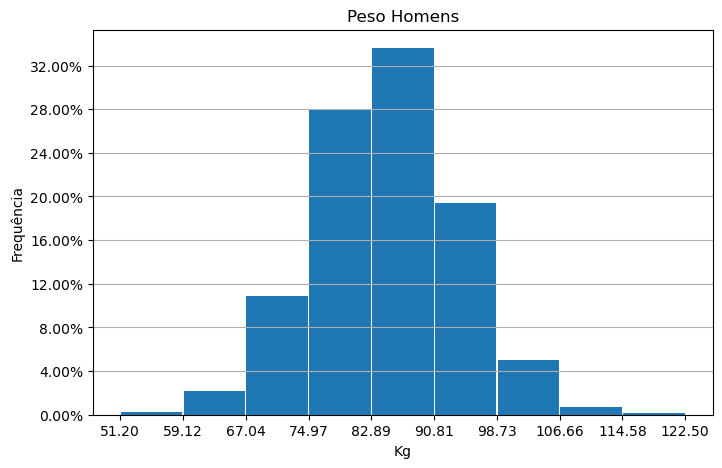

In [21]:
# Analisando a distribuição do peso dos homens
gera_histograma(9, peso_homens, 'Peso Homens', 'Kg')

### Variância e Desvio Padrão

* Variância é a dispersão dos dados em relação a média
* Desvio-padrão é a raiz quadrada da variância

Para extrairmos a variância calculando cada um dos elementos precisamos da média, diminuindo cada elemento pela média elevando ao quadrado e somando um por um, dividindo pelo tamanho do conjunto menos 1 iremos obter a variância do conjunto.

In [22]:
# Vamos obter uma variaval com uma amostra da altura dos homens
dados = altura_homens.sample(5)
dados

1490    172.0
692     167.0
1435    171.0
1116    170.0
3674    180.0
Name: Altura cm, dtype: float64

In [23]:
# Precisamos da média da amostra
media =dados.mean()

In [24]:
# Convertendo para uma lista
dados = dados.values
dados[0]

172.0

In [25]:
# Para gerar a variância em calculos normais seria assim
var = ((dados[0]-media)**2 + (dados[1]-media)**2 + (dados[2]-media)**2 + 
       (dados[3]-media)**2 + (dados[4]-media)**2)/(len(dados)-1)
var

23.5

In [26]:
# Tirando a prova real da variÂncia
stats.variance(dados)

23.5

In [27]:
# Obtendo o desvio padrão de módulo calculado
(var ** (1/2))

4.847679857416329

In [28]:
# Tirando a prova do desvio padrão
math.sqrt(var)  # Usando o módulo matematico math
stats.stdev(dados)  # Usando o módulo estatístico statistics

4.847679857416329

### Coeficiente de Variação

In [29]:
# para sabermos o coeficiente de variação da altura das mulheres e homens precisamo da média e desvio
dp_mulheres = stats.stdev(altura_mulheres)  # Desvio-Padrão
med_mulheres = stats.mean(altura_mulheres)  # Média

# Para gerar o coeficiente é so usar a formula CV= dp / med
cv_mulheres = dp_mulheres / med_mulheres
pct(cv_mulheres)

'4.23%'

In [30]:
# Agora usando os dados dos homens
med_homens = stats.mean(altura_homens)  # Média
dp_homens = stats.stdev(altura_homens)  # Desvio

# O coeficiente da altura dos homens
cv_homens = dp_homens / med_homens
pct(cv_homens)

'4.16%'

In [31]:
# E o coeficiente de variação do peso das mulheres?
dp_mulheres = stats.stdev(peso_mulheres)  # Desvio-Padrão
med_mulheres = stats.mean(peso_mulheres)  # Média

# Para gerar o coeficiente é so usar a formula CV= dp / med
cv_mulheres = dp_mulheres / med_mulheres
pct(cv_mulheres)

'14.00%'

In [32]:
# Agora usando os dados dos homens
med_homens = stats.mean(peso_homens)  # Média
dp_homens = stats.stdev(peso_homens)  # Desvio

# O coeficiente da altura dos homens
cv_homens = dp_homens / med_homens
pct(cv_homens)

'10.58%'

### Covariância

Calculando a covariância como seria feito na mão

In [33]:
# Precisamos dos dados de x e y, que seria altura e peso
# Separando uma amostra dos dados
df_cov = data[['Altura cm', 'Peso kg']].head()
df_cov

,Altura cm,Peso kg
0,188.0,109.7
1,175.0,73.6
2,188.0,96.5
3,182.0,99.8
4,177.0,93.6


In [34]:
# gerando a media de altura e peso
med_altura = df_cov['Altura cm'].mean()
med_peso = df_cov['Peso kg'].mean()

In [35]:
# lista para receber os valores
cov_lista = []

In [36]:
# Precisamos calcular cada valor dentro da amostra, criando um loop para facilitar
for i in range(0,len(df_cov)):
    cov_lista.append((df_cov['Altura cm'][i]-med_altura)*(df_cov['Peso kg'][i]-med_peso))

In [37]:
# Visualizando a lista com os valores
cov_lista

[90.35999999999993,
 147.28000000000014,
 11.159999999999911,
 0.0,
 5.200000000000102]

In [38]:
# Precisamos somar todos os valores da lista e dividir pelo tamanho da amostra -1
cov = sum(cov_lista)/(len(df_cov)-1)  # Temos o valor da covariância
cov

63.50000000000002

### Coeficiente de Correlação

Cov(x,y) / stdev(x) * stdev(y)

In [39]:
# desvio padrão
dp_altura = stats.stdev(df_cov['Altura cm'])
dp_peso = stats.stdev(df_cov['Peso kg'])

print(f'Desvio Altura: {dp_altura} | Desvio Peso: {dp_peso}')

Desvio Altura: 6.041522986797286 | Desvio Peso: 13.234915942309572


In [40]:
# Para ter o coeficiente de correlação é so pegar a covariancia e dividir pelos desvios
coef_corr = cov / (dp_altura * dp_peso)

# Temos 79,42% de correlação entre as amostras de Altura e Peso 
# significa que a altura consegue explicar o peso tendo uma relação e um porque
pct(coef_corr)

'79.42%'

In [41]:
# Usando o módulo corr para ter a prova real
df_cov.corr()  # Temos 0.7941 - 79,41% 

,Altura cm,Peso kg
Altura cm,1.000000,0.794157
Peso kg,0.794157,1.000000


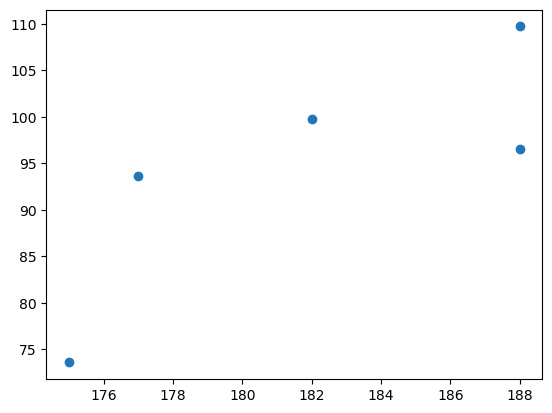

In [42]:
# É visivel a relação entre os dados, é comum ver uma pessoa acima de 1.80 ter um peso proximo a 100kg
# assim como menor o tamanho menos peso a pessoa terá.
plt.scatter(df_cov['Altura cm'], df_cov['Peso kg'])

In [43]:
# Importando o Seaborn 
import seaborn as sns

<Axes: xlabel='Altura cm', ylabel='Peso kg'>

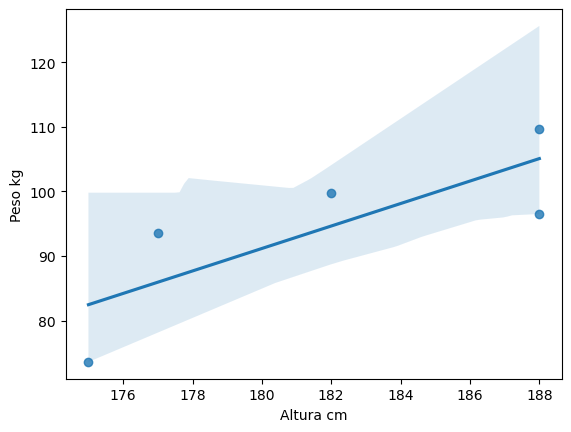

In [44]:
sns.regplot(x=df_cov['Altura cm'],y= df_cov['Peso kg'])

In [45]:
# Verificando a relação de peso e altura por genero e visualizando no gráfico
mulheres = data.loc[data['Genero'] == 'Female'][['Altura cm', 'Peso kg']] 
homens = data.loc[data['Genero'] == 'Male'][['Altura cm', 'Peso kg']]

In [46]:
# Correlação entre os dados
homens.corr()

,Altura cm,Peso kg
Altura cm,1.000000,0.862458
Peso kg,0.862458,1.000000


In [47]:
# Correlação entre os dados
mulheres.corr()

,Altura cm,Peso kg
Altura cm,1.00000,0.84897
Peso kg,0.84897,1.00000


<Axes: xlabel='Altura cm', ylabel='Peso kg'>

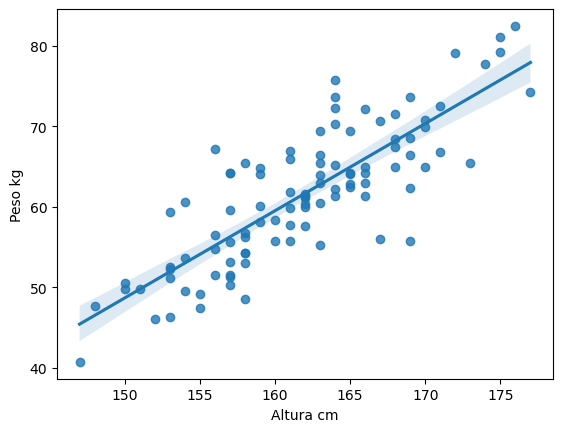

In [48]:
# Visualizando os dados em gráfico
sns.regplot(x=mulheres['Altura cm'][2000:2100], y=mulheres['Peso kg'][2000:2100])

# Temos a relação de uma amostra de 100 individuos, validando a relação de peso e altura

<Axes: xlabel='Altura cm', ylabel='Peso kg'>

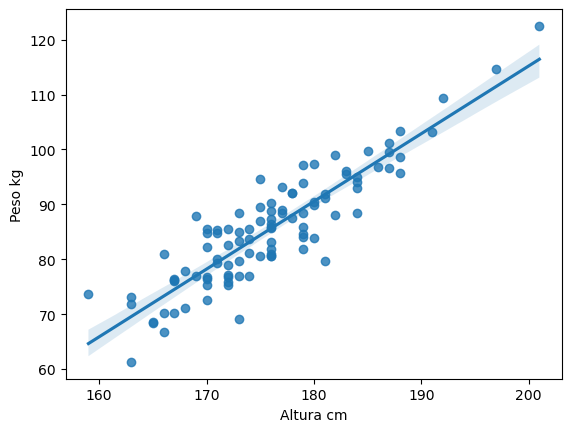

In [49]:
sns.regplot(x=homens['Altura cm'][2000:2100], y=homens['Peso kg'][2000:2100])

## Probabilidade

* **Espaço Amostral**: todos os resultados possíveis (moeda: K,C)
* **Probabilidade**: chance de um evento ocorrer
    * Escala de 0 a 1
        * 0 ==> certo de que **não vai acontecer**
        * 1 ==> certo que **vai acontecer**
        * 0.5 ==> **igualmente** possível de acontecer ou de não acontecer
        * Ex1: **0.05 provavelmente não** vai acontecer, mas pode acontecer
        * Ex2: **0.95 provavelmente vai** acontecer, mas pode não acontecer

<center><strong>Probabilidade Teórica</strong>: o que a gente espera que aconteça ou o que deveria acontecer</center>
$$P(E) = {\frac {resultados} {espaço amostral}}$$

<center>Ex: Jogar uma moeda pro alto. Se quero cara.</center>
$$P(K) = {\frac {1} {2}}=0.5$$

<center><strong>Probabilidade Empírica</strong>: a chance de algo acontecer baseado no que aconteceu em algum experimento</center>
<center>Ex: Jogar uma moeda pro alto 100 vezes. Obtenho 56 caras.</center>
$$P(K) = {\frac {56} {100}}=0.56$$

<strong>Lei dos grandes números (LGN)</strong>: quanto mais experimentos eu faço, mais perto a probabilidade empírica se aproxima da probabilidade teórica
<p>
    Ex: Se jogar uma moeda pro alto 10.000 vezes, estará mais perto de 50% de probabilidade de dar cara do que jogando apenas 100 vezes. Se jogar 1.000.000 vezes, mais perto de 50% estará do que 10.000 vezes...

<center><strong>Probabilidade condicional</strong>: P(B|A) >> probabilidade de B considerando que A já ocorreu</center><br>
$$P(B|A) = {\frac {P(A \cap B)} {P(A)}}$$

<center><strong>e: P(A e B)</strong>: probabilidade dos dois ocorrerem juntos</center><br>
$$P(A \cap B) = {P(A)}\cdot{P(B|A)}$$

<center><strong>ou: P(A ou B)</strong>: probabilidade de A ocorrer ou B ocorrer ou os dois ocorrerem</center><br>
$$P(A \cup B) = {P(A)}+{P(B)}-{P(A \cap B)}$$

<center><strong>Exercícios</strong>: oito cartas de UNO, sendo quatro azul e quatro vermelhas.</center>
<img src="imagens/redblue.png"
     alt="Uno"
     width=300px />

<center>1. Probabilidade de ser Azul <strong>e</strong> Par</center><br>
$$P(Azul \cap Par) = {\frac {4} {8}}\cdot{\frac {2} {4}} = {\frac {1} {2}}\cdot{\frac {1} {2}}={\frac {1} {4}}=0.25$$

<center>2. Probabilidade de ser Azul sabendo que a carta <strong>é Par</strong></center><br>
$$P(Azul|Par) = {\frac {P(Azul \cap Par)} {P(Par)}}={\frac {2/8} {4/8}}={\frac {2} {4}}={\frac {1} {2}}=0.5$$

<center>3. Probabilidade de ser Azul <strong>ou</strong> Par</center><br>
$$P(Azul \cup Par) = P(Azul)+P(Par)-P(Azul \cap Par)={\frac {4} {8}}+{\frac {4} {8}}-{\frac {2} {8}}={\frac {6} {8}}={\frac {3} {4}}=0.75$$

<center>4. Probabilidade de pegar aleatoriamente duas cartas Azul <strong>sem substituição</strong></center><br>
$$P(Azul_1 \cap Azul_2) = P(Azul_1)\cdot{P(Azul_2)} ={\frac {4} {8}}\cdot{\frac {3} {7}}={\frac {1} {2}}\cdot{\frac {3} {7}}={\frac {3} {14}}=0.2143$$

**Eventos independentes**: quando um evento ocorre não modifica a chance de outro evento ocorrer. <br />
Ex: Cara ou Coroa. Podemos representá-los de três formas:
* $P(A|B) = P(A)$
* $P(B|A) = P(B)$
* $P(A \cap B) = P(A)\cdot{P(B)}$

**Mutuamente Exclusivo**: ambos não podem acontecer ao mesmo tempo.<br />
Ex: Ao jogar um cubo, sejam A = números ímpares menores do que 4, B = números maiores do que 3
* $A=[1,3]$ 
* $B=[4,5,6]$
* $P(A \cap B) = 0$

<center><h1> Diagrama de Árvore</h1>
Uma maneira de solucionar problemas de Probabilidade Condicional
<img src="imagens/6cards.png" alt="Uno" width=200px />
</center>

Considerando a imagem acima, onde temos um total de 6 cartas, sendo 2 azuis e 4 vermelhas. Ao colocar essas cartas numa bolsa, retiraremos duas cartas em sequência, sem substituição. Responda qual a probabilidade em cada um dos seguintes cenários:

    1. Azul na primeira, Azul na segunda.
    2. Azul na primeira, Vermelha na segunda.
    3. Vermelha na primeira, Azul na segunda.
    4. Vermelha na primeira, Vermelha na segunda.

<img src="imagens/arvore.png"  width=900px/>

<center><h1>Probabilidade Condicional x Teorema de Bayes</h1></center>

<center>
    <h3>Probabilidade Condicional</h3>  
      Probabilidade da carta ser <strong>vermelha</strong> sabendo que a carta <strong>é ímpar</strong>
</center><br>
$$P(vermelha|ímpar) = {\frac {P(vermelha \cap ímpar)} {P(ímpar)}}={\frac {2/6} {4/6}}={\frac {1/3} {2/3}}={\frac {1} {2}}=0.5$$

<center><h1>Teorema de Bayes</h1>
Uma forma de calcular probabilidade condicional de uma hipótese dada uma nova evidência. $P(A|B)$
</center><br />

$$P(A|B) = {\frac {P(B|A)\cdot P(A)} {P(B)}}$$

O Teorema de Bayes depende de três fatores:
1. A probabilidade de um evento ocorrer dada uma Hipótese $P(B|A)$
2. Probabilidade anterior da Hipótese $P(A)$
3. Probabilidade anterior da Evidência $P(B)$

Probabilidade de ter escolhido uma carta vermelha, sabendo que a carta é ímpar.

* <strong>A</strong> = carta vermelha
* <strong>B</strong> = carta ímpar

 * $P(A|B) = P(vermelha|ímpar) = ?$ 
 * $P(B|A) = P(ímpar|vermelha) = 1/2$  
 * $P(A) = P(vermelha) = 4/6 = 2/3$
 * $P(B) = P(ímpar) = 4/6 = 2/3$

$$P(vermelha|ímpar) = {\frac {{1/2} \cdot {2/3}} {2/3}}={\frac {1}{2}}=0.5$$

<h3>Teorema de Bayes</h3>
Considere duas moedas em uma bolsa: uma comum, outra viciada (possui cara nos dois lados).
Você retira uma moeda sem ver qual está pegando, joga para o alto, dá cara. Qual a probabilidade de você ter escolhido a moeda viciada sabendo que deu cara?

* <strong>A</strong> = moeda viciada
* <strong>B</strong> = cara

 * $P(A|B) = P(viciada|cara) = ?$ 
 * $P(B|A) = P(cara|viciada) = 1$ # 100% 
 * $P(A) = P(viciada) = 1/2$
 * $P(B) = P(cara) = 3/4$ 
 
$$P(viciada|cara) = {\frac {{1} \cdot {1/2}} {3/4}}={\frac {1} {2}} \cdot {\frac {4} {3}}={\frac {4} {6}}={\frac {2}{3}}=0.6666$$

<center>
    <h3>Probabilidade Condicional</h3>  
      probabilidade de você ter <strong>escolhido a moeda viciada</strong> sabendo que deu <strong>cara</strong>
</center><br>
$$P(viciada|cara) = {\frac {P(viciada \cdot cara)} {P(cara)}}={\frac {1/2 \cdot 1} {3/4}}={\frac {1} {2}} \cdot {\frac {4} {3}}={\frac {4} {6}}={\frac {2} {3}}=0.6666$$

**Conclusão**: como observado, ambas as fórmulas produzem o mesmo resultado, porém a forma de interpretar é diferente.

# Teorema do Limite Central
* **Médias Amostrais**: médias geradas de amostras, geralmente com o propósito de gerar probabilidades
* A média de médias amostrais deve ser mais próxima da média da população com um desvio padrão pequeno
* Quanto maior a quantidade de amostras e médias amostrais utilizadas, mais próximo estará da média geral da População e menor o desvio padrão

<center><h2>Exemplo: Cubo</h2>
Consideremos um dado de seis lados. A probabilidade de dar qualquer valor entre 1 e 6 é de ${\frac {1}{6}}$ ou seja, todos os valores são igualmente possíveis de ocorrer. O conjunto de números possíveis são $[1,2,3,4,5,6]$. Ao realizar a média desse conjunto $(1+2+3+4+5+6)/6$, obtivemos <strong>3.5</strong>.
<img src="imagens/dado.jpg" alt="Dado" width=300px />
</center>

### Importar numpy e matplotlib

In [51]:
import numpy as np
import matplotlib.pyplot as plt

Média

In [57]:
 np.mean([1,2,3,4,5,6])

3.5

Jogando os dados aleatoriamente

In [93]:
np.random.randint(1, 7)

4

Jogar dados aleatoriamente 6 vezes

In [106]:
np.random.randint(1, 7, 6)

array([3, 4, 2, 2, 1, 2])

Gerar os mesmos números aleatórios usando uma semente (seed) '123'

In [105]:
np.random.seed(123)
np.random.randint(1, 7, 6)

array([6, 3, 5, 3, 2, 4])

Jogar dado aleatóriamente 40 vezes

In [112]:
np.random.seed(123)
amostra = np.random.randint(1,7,40)
amostra

array([6, 3, 5, 3, 2, 4, 3, 4, 2, 2, 1, 2, 2, 1, 1, 2, 4, 6, 5, 1, 1, 5,
       2, 4, 3, 5, 3, 5, 1, 6, 1, 2, 4, 5, 5, 5, 2, 6, 4, 3])

Gerar média amostral

In [113]:
np.mean(amostra)

3.275

### Utilizar mil médias amostrais
Comprovar o Teorema do Limite Central (TLC)

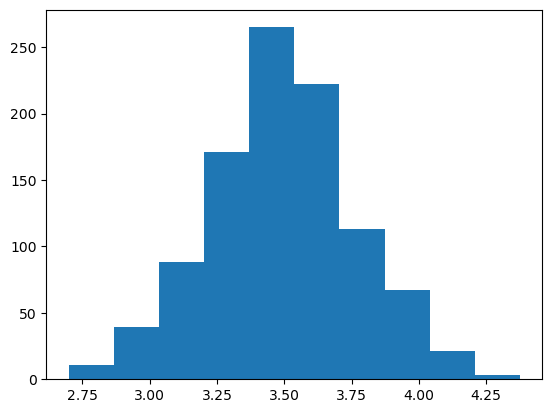

In [117]:
np.random.seed(123)
medias_amostrais = [np.mean(np.random.randint(1,7,40)) for _ in range(1000)]
plt.hist(medias_amostrais)
plt.show()

Média

In [118]:
np.mean(medias_amostrais)

3.49475

Mediana

In [120]:
np.median(medias_amostrais)

3.5

Moda

In [122]:
stats.mode(medias_amostrais)

3.45

### Teorema do Limite Central em um DataFrame
Aplicando o mesmo conceito com um DataFrame de um arquivo CSV

Importando pandas

In [123]:
import pandas as pd

Ler DataFrame do arquivo 'Weight-height.csv'

In [129]:
df = pd.read_csv('weight-height.csv')

Verificar tamano da amostra

In [126]:
df.shape

(10000, 3)

Gerar amostra aleatoria 5 elementos

In [132]:
amostra = df['Weight'].sample(5)
amostra

9360    136.494215
9570    158.535927
9711    143.664714
1986    227.945248
9055    138.537481
Name: Weight, dtype: float64

Gerar 200 médias amostrais de 50 amostras cada

In [135]:
np.random.seed(123)
medias_amostrais = []

for _ in range(200):
    medias_amostrais.append(np.mean(df['Weight'].sample(50)))

In [136]:
# Visualizando
medias_amostrais

[162.77364907563273,
 169.17896607898004,
 173.54232012047927,
 159.02814469668192,
 163.53859638246243,
 155.08083783726497,
 152.37682945131976,
 158.58754812843728,
 162.85151871487437,
 160.2262092985831,
 155.91778483747655,
 164.55078574428998,
 163.7216758194734,
 162.9678230214546,
 159.4788399194415,
 164.1722456620811,
 154.2460609361593,
 155.0067123771831,
 157.6415340956235,
 162.4066662215306,
 153.67387722752778,
 159.99387664769748,
 161.54661906371445,
 157.98792904509847,
 166.50849248505153,
 161.48351454577565,
 161.58175586135735,
 156.93803413482527,
 160.8867436090186,
 158.77044671829583,
 163.77610710297859,
 166.3419735238348,
 161.4699851213748,
 154.37591378011538,
 161.53513774063413,
 165.49680449576442,
 163.30829928444783,
 165.99900708566344,
 159.17175737543184,
 164.07840580207613,
 157.05044183651148,
 160.38800286363877,
 165.80804201401287,
 160.87141841898753,
 159.0040573307023,
 162.05476785386566,
 161.4310659734868,
 159.4254748185431,
 155.92

In [138]:
# tamanho das medias amostrais
len(medias_amostrais)

200

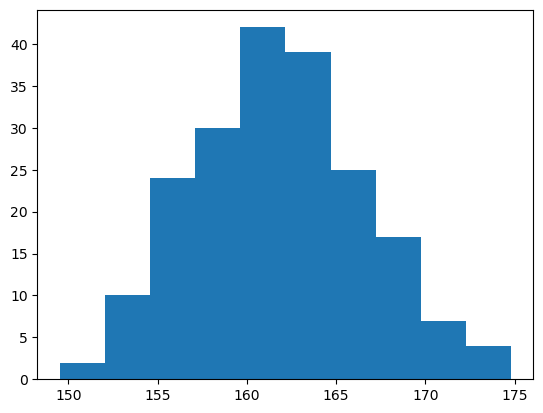

In [139]:
# Observamos que temos uma distribuição normal
plt.hist(medias_amostrais)
plt.show()

<center><h1> Intervalo de Confiança</h1>
 Um intervalo baseado numa amostra estatística, onde um parâmetro da População tem maior chance de estar localizado</center>

<strong>Vocabulários:</strong>
* $\hat{p}$: Proporção (probabilidade de sucesso)
* $\hat{q}$: Probabilidade de Falha
* $Nível De Confiança$: Probabilidade do intervalo conter o parâmetro da População
* $\alpha$: probabilidade de estar errado (100% menos o Nível de Confiança)
* $E$: Margem de Erro
* $Z$: Valor-Z que nos dá a área de cada calda lateral da distribuição normal correspondente a probabilidade de estarmos errados.

<br/><center>Proporção ($\hat{p}$)</center>
$$\boxed {\hat{p} = \frac {sucessos} {tentativas}=\frac x n}$$

<br/><center>Probabilidade de falha ($\hat{q}$)</center>
$$\boxed {\hat{q} = 1-\hat{p}}$$

<br/><center>Margem de Erro (E)</center>
$$\boxed {E = Z_{\alpha/2} \sqrt { \frac {\hat{p}\hat{q}}{n}}}$$

<br/><center>Intervalo de Confiança</center>
$$\boxed {\hat{p}-E,\hat{p}+E}$$ 

<center><h2>Nível de Confiança x $Z_{\alpha/2}$</h2></center>

| Niv Conf  | $Z_{\alpha/2}$|
|-----|--------------:|
| 90% |  1.645 | 
| 95% |  1.960 | 
| 99% |  2.576 | 

<center><h2> Noventa Porcento</h2>
Noventa por cento de confiança em que os dados de um parâmetro da População se encontram nesse intervalo
<img src="imagens/90.png" width=400px />
</center>

<center><h2>Noventa e Cinco Por Cento</h2>
Noventa por cento de confiança de que os dados de um parâmetro da População se encontram nesse intervalo
<img src="imagens/95.png" width=400px />
</center>

<center><h1>Noventa e Nove Por Cento</h1>
Noventa por cento de confiança de que os dados de um parâmetro da População se encontram nesse intervalo
<img src="imagens/99.png" width=400px />
</center>

# Exercício
Numa pesquisa constatou-se que 95 de um total de 174 pessoas votarão em um específico candidato ao Senado. Construa uma estimativa com um Intervalo de Confiança de 90% de proporção das pessoas de toda a População que votarão nesse candidato. 

$$\hat{p}=\frac x n = \frac {95} {174} = 0.546$$ <br/>

$$\hat{q}= 1-0.546 = 0.454$$ <br/>

$$Z_{\alpha/2} = Z_{0.10/2} = Z_{0.05}=1.645$$ <br/>

$$E = Z_{\alpha/2} \sqrt { \frac {\hat{p}\hat{q}}{n}}=1.645 \sqrt { \frac {0.546 \cdot 0.454}{174}}=0.062$$ <br/>

$$[\hat{p}-E,\hat{p}+E] = [0.546-0.062, 0.546+0.062] = [0.484,0.608] $$ 

### Interpretando o Intervalo de Confiança
"Estimamos com X% de confiança, que a real população (parâmetro em contexto) se encontra entre (menor) e (maior)"

**Estimamos com 90% de confiança que a proporção das pessoas de toda a população que votarão no candidato ao Senado se encontra entre 48,4% e 60,8%.**

# Teste de Hipóteses
 Uma forma de testar uma afirmação

1. Define-se duas hipóteses:
    * $H_0$: Hipótese Nula ( geralmente usa-se = )
        * Assumimos que é verdade
    * $H_a$: Hipótese Alternativa ( geralmente >, <, ≠ )
        * Usamos $H_a$ para tentar reunir provas suficientes para rejeitar $H_0$ <br />
<br>
2. Testa-se uma amostra 
<br>

3. Calcula-se a probabilidade de $H_0$ ser verdadeira, baseando-se na nossa amostra (Através do **valor-p**)
<br>

4. Compara-se $\alpha$ (a menor probabilidade de que nós ainda acreditaremos que $H_0$ é verdadeira):
    * Se o valor-p (probabilidade de $H_0$ ser verdadeira) for menor que $\alpha$, nós **rejeitaremos $H_0$ (valor-p < $\alpha$)**
    * Se o valor-p for maior que $\alpha$ nós **falhamos em rejeitar $H_0$ (valor-p > $\alpha$)**



## Exemplo (Tribunal)
Considere um tribunal. Uma pessoa é acusada de um crime.

$H_0$: inocente <br>
$H_a$: culpada

Assume-se que a pessoa é inocente até comprovado que é culpada (p-value) além de uma dúvida razoável ($\alpha$)

Se comprovado culpado: rejeitamos a $H_0$ e concluímos que o acusado é "culpado".<br>
Se não: falhamos em rejeitar a $H_0$ e concluímos que "não é culpado" ( a conclusão tem foco na $H_a$).

**Nós nunca concluímos que $H_0$ é verdadeira**

### Conclusões
"Existe (ou não existe) suficiente evidência para concluir (Hipótese Alternativa em contexto)".

## Teste de Hipóteses para proporções

### Fórmulas
Proporções são normalmente distribuidas com a proporção agindo como média, e $\sqrt {\frac {\hat{p}\hat{q}}{n}}$ como Erro Padrão
$$\hat{p} \sim N(\hat{p}, \sqrt {\frac {\hat{p}\hat{q}}{n}})$$

No teste de hipóteses, ao invés da proporção, usamos os valores da $H_0$ (diferente do intervalo de confiança)

Para calcular a probabilidade (valor-p), precisaremos do $\hat{p}$ da proporção da amostra, $\hat{p}$ da probabilidade da hipótese nula, e do Erro Padrão (EP).
$$Z = \frac {\hat{p} - \hat{p}_{H_0}}{EP}$$


## Exemplo (IPhone)
Uma empresa telefônica afirma que 43% dos usuários de smartphone nos EUA usam IPhone. Você duvida dessa afirmação. Então você faz uma pesquisa de 83 usuários americanos de smartphone. 44 deles usam IPhone. O que você pode concluir, se $\alpha=0.05$?

$H_0$: $\hat{p}$ = 0.43 <br>
$H_a$: $\hat{p}$ ≠ 0.43 _(teste de duas caldas, rejeitamos se for menor ou maior)_

$$\hat{p} \sim N(\hat{p}, \sqrt {\frac {\hat{p}\hat{q}}{n}})=\hat{p} \sim N(0.43,\sqrt {\frac {0.43 \cdot 0.57}{83}})=\hat{p} \sim N(0.43,0.0543)$$

<img src="imagens/1.png" width=350px /><br><br>

<center>Calculando o $\hat{p}$ da proporção</center>
$$\hat{p} = \frac x n = \frac {44}{83} = 0.53$$
<img src="imagens/2.png" width=350px /><br><br>


<center>Calculando o valor-Z</center>
$$Z = \frac {\hat{p} - \hat{p}_{H_0}}{EP} = \frac {0.53 - 0.43}{0.0543}=1.84$$
<img src="imagens/3.png" width=350px /><br><br>

<center>Ir na tabela Z e verificar a probabilidade correspondente desse valor-Z: $0.9671$, se tirarmos a outra metade, $0.9671-0.5 = 0.4671$ </center>
<img src="imagens/4.png" width=350px /><br><br>

<center>Mas a área que desejamos é a da calda. Logo, calculamos $0.5 - 0.4671 = 0.0329$</center>
<img src="imagens/6.png" width=350px /><br><br>

Calculamos o valor-p = $0.0329 + 0.0329 = 0.0658$ (valor-p é a probabilidade de $H_0$ ser verdadeira baseando-se na nossa amostra).Em outras palavras, baseando-se na nossa pesquisa, existe 6.58% de chance da proporção de usuários realmente ser 43%.

**Decisão**: falhamos em rejeitar a hipótese nula<br>
**Motivo**: valor-p > $\alpha$ = 0.068 > 0.005<br>
**Conclusão**: Não existe suficiente evidência para concluir que a proporção de usuários de IPhone é diferente de 43%.

# Façamos um intervalo de confiança de 95%
$$\hat{p} = 0.53$$ <br>
$$\hat{q} = 0.47$$ <br>
$$Z_{\alpha/2} = Z_{0.05/2} = Z_{0.025}=1.96$$ <br>

$$E = Z_{\alpha/2} \sqrt { \frac {\hat{p}\hat{q}}{n}}=1.96 \sqrt { \frac {0.53 \cdot 0.47}{83}}=0.107$$ <br/>

$$[\hat{p}-E,\hat{p}+E] = [0.53-0.107, 0.53+0.107] = [0.423,0.637] $$ 

**Podemos dizer com 95% de confiança que a proporção de americanos que usam IPhone se encontra entre 42,3% e 63,7%.**